# Corona Virus

* Coronaviruses are **zoonotic** viruses (means transmitted between animals and people).  
* Symptoms include from fever, cough, respiratory symptoms, and breathing difficulties. 
* In severe cases, it can cause pneumonia, severe acute respiratory syndrome (SARS), kidney failure and even death.
* Coronaviruses are also asymptomatic, means a person can be a carrier for the infection but experiences no symptoms

# Novel coronavirus (nCoV)
* A **novel coronavirus (nCoV)** is a new strain that has not been previously identified in humans.

# COVID-19 (Corona Virus Disease 2019)
* Caused by a **SARS-COV-2** corona virus.  
* First identified in **Wuhan, Hubei, China**. Earliest reported symptoms reported in **November 2019**. 
* First cases were linked to contact with the Huanan Seafood Wholesale Market, which sold live animals. 
* On 30 January the WHO declared the outbreak to be a Public Health Emergency of International Concern 

# Acknowledgements

> https://github.com/CSSEGISandData/COVID-19

# Collection methodology

> https://github.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning

# Libraries

### Install

In [1]:
# install calmap
pip install calmap

### Import

In [0]:
# essential libraries
import json
import random
from urllib.request import urlopen

# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import calmap
import folium

# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# html embedding
from IPython.display import Javascript
from IPython.core.display import display
from IPython.core.display import HTML

In [3]:
# install wget
pip install wget

In [0]:
import wget

urls = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', 
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv']

for url in urls:
    filename = wget.download(url)



# dataset
# --------

conf_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recv_df = pd.read_csv('time_series_covid19_recovered_global.csv')


In [5]:
conf_df.head()

Province/State Country/Region      Lat  ...  3/27/20  3/28/20  3/29/20
0            NaN    Afghanistan  33.0000  ...      110      110      120
1            NaN        Albania  41.1533  ...      186      197      212
2            NaN        Algeria  28.0339  ...      409      454      511
3            NaN        Andorra  42.5063  ...      267      308      334
4            NaN         Angola -11.2027  ...        4        5        7

[5 rows x 72 columns]

In [6]:
deaths_df.head()

Province/State Country/Region      Lat  ...  3/27/20  3/28/20  3/29/20
0            NaN    Afghanistan  33.0000  ...        4        4        4
1            NaN        Albania  41.1533  ...        8       10       10
2            NaN        Algeria  28.0339  ...       26       29       31
3            NaN        Andorra  42.5063  ...        3        3        6
4            NaN         Angola -11.2027  ...        0        0        2

[5 rows x 72 columns]

In [7]:
recv_df.head()

Province/State Country/Region      Lat  ...  3/27/20  3/28/20  3/29/20
0            NaN    Afghanistan  33.0000  ...        2        2        2
1            NaN        Albania  41.1533  ...       31       31       33
2            NaN        Algeria  28.0339  ...       29       31       31
3            NaN        Andorra  42.5063  ...        1        1        1
4            NaN         Angola -11.2027  ...        0        0        0

[5 rows x 72 columns]

## Merge Data

In [8]:
dates = conf_df.columns[4:]

conf_df_long = conf_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

deaths_df_long = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

recv_df_long = recv_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                             value_vars=dates, var_name='Date', value_name='Recovered')

full_table = pd.concat([conf_df_long, deaths_df_long['Deaths'], recv_df_long['Recovered']], 
                       axis=1, sort=False)

full_table.head()



Province/State Country/Region      Lat  ...  Confirmed Deaths  Recovered
0            NaN    Afghanistan  33.0000  ...          0      0        0.0
1            NaN        Albania  41.1533  ...          0      0        0.0
2            NaN        Algeria  28.0339  ...          0      0        0.0
3            NaN        Andorra  42.5063  ...          0      0        0.0
4            NaN         Angola -11.2027  ...          0      0        0.0

[5 rows x 8 columns]

## Cleaning

In [0]:
# removing
# =======

# removing canada's recovered values
full_table = full_table[full_table['Province/State'].str.contains('Recovered')!=True]

# removing county wise data to avoid double counting
full_table = full_table[full_table['Province/State'].str.contains(',')!=True]

In [10]:
full_table[(full_table['Date']=='2/12/20') & (full_table['Province/State']=='Hubei')]

Province/State Country/Region      Lat  ...  Confirmed Deaths  Recovered
5375          Hubei          China  30.9756  ...      33366   1068        0.0

[1 rows x 8 columns]

## Saving full data

In [0]:
full_table.to_csv('complete_data.csv', index=False)

## Country wise data

In [0]:
# china
# =====

china_province_wise = full_table[full_table['Country/Region']=='China']
china_province_wise['Province/State'].unique()
china_province_wise.to_csv('china_province_wise.csv', index=False)

In [0]:
# Australia
# =========

australia_state_wise = full_table[full_table['Country/Region']=='Australia']
australia_state_wise['Province/State'].unique()
australia_state_wise.to_csv('australia_state_wise.csv', index=False)

In [0]:


# Canada
# ======

canada_state_wise = full_table[full_table['Country/Region']=='Canada']
canada_state_wise['Province/State'].unique()
canada_state_wise.to_csv('canada_state_wise.csv', index=False)



# Dataset

In [0]:
# list files
# !ls ../input/corona-virus-report

In [16]:
# importing datasets
full_table = pd.read_csv('complete_data.csv', 
                         parse_dates=['Date'])
full_table.head()

Province/State Country/Region      Lat  ...  Confirmed Deaths  Recovered
0            NaN    Afghanistan  33.0000  ...          0      0        0.0
1            NaN        Albania  41.1533  ...          0      0        0.0
2            NaN        Algeria  28.0339  ...          0      0        0.0
3            NaN        Andorra  42.5063  ...          0      0        0.0
4            NaN         Angola -11.2027  ...          0      0        0.0

[5 rows x 8 columns]

In [0]:
# dataframe info
# full_table.info()

In [0]:
# checking for missing value
# full_table.isna().sum()

# Preprocessing

### Cleaning Data

In [0]:
# cases 
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']

# Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

# replacing Mainland china with just China
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')

# filling missing values 
full_table[['Province/State']] = full_table[['Province/State']].fillna('')
full_table[cases] = full_table[cases].fillna(0)

### Derived Tables

In [0]:
# cases in the ships
ship = full_table[full_table['Province/State'].str.contains('Grand Princess')|full_table['Country/Region'].str.contains('Cruise Ship')]

# china and the row
china = full_table[full_table['Country/Region']=='China']
row = full_table[full_table['Country/Region']!='China']

# latest
full_latest = full_table[full_table['Date'] == max(full_table['Date'])].reset_index()
china_latest = full_latest[full_latest['Country/Region']=='China']
row_latest = full_latest[full_latest['Country/Region']!='China']

# latest condensed
full_latest_grouped = full_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
china_latest_grouped = china_latest.groupby('Province/State')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
row_latest_grouped = row_latest.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()

# Latest Data

### Latest Condensed Data

In [21]:
temp = full_table.groupby('Date')['Confirmed', 'Deaths'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')

# Maps

In [22]:
formated_gdf = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date'] = pd.to_datetime(formated_gdf['Date'])
formated_gdf['Date'] = formated_gdf['Date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="Country/Region", locationmode='country names', 
                     color="Confirmed", size='size', hover_name="Country/Region", 
                     range_color= [0, max(formated_gdf['Confirmed'])+2], 
                     projection="natural earth", animation_frame="Date", 
                     title='Spread over time')
fig.update(layout_coloraxis_showscale=False)
fig.show()

# No. of places to which COVID-19 spread

In [23]:
c_spread = china[china['Confirmed']!=0].groupby('Date')['Province/State'].unique().apply(len)
c_spread = pd.DataFrame(c_spread).reset_index()

fig = px.line(c_spread, x='Date', y='Province/State', text='Province/State',
              title='Number of Provinces/States/Regions of China to which COVID-19 spread over the time',
             color_discrete_sequence=[cnf,dth, rec])
fig.update_traces(textposition='top center')
fig.show()

# ------------------------------------------------------------------------------------------

spread = full_table[full_table['Confirmed']!=0].groupby('Date')['Country/Region'].unique().apply(len)
spread = pd.DataFrame(spread).reset_index()

fig = px.line(spread, x='Date', y='Country/Region', text='Country/Region',
              title='Number of Countries/Regions to which COVID-19 spread over the time',
             color_discrete_sequence=[cnf,dth, rec])
fig.update_traces(textposition='top center')
fig.show()

# Top 20 Countries

In [24]:
flg = full_latest_grouped
flg.head()

Country/Region  Confirmed  Deaths  Recovered  Active
0    Afghanistan        120       4        0.0     0.0
1        Albania        212      10        0.0     0.0
2        Algeria        511      31        0.0     0.0
3        Andorra        334       6        0.0     0.0
4         Angola          7       2        0.0     0.0

In [25]:
fig = px.bar(flg.sort_values('Confirmed', ascending=False).head(20).sort_values('Confirmed', ascending=True), 
             x="Confirmed", y="Country/Region", title='Confirmed Cases', text='Confirmed', orientation='h', 
             width=700, height=700, range_x = [0, max(flg['Confirmed'])+10000])
fig.update_traces(marker_color='#46cdcf', opacity=0.8, textposition='outside')
fig.show()

In [26]:
fig = px.bar(flg.sort_values('Deaths', ascending=False).head(20).sort_values('Deaths', ascending=True), 
             x="Deaths", y="Country/Region", title='Deaths', text='Deaths', orientation='h', 
             width=700, height=700, range_x = [0, max(flg['Deaths'])+500])
fig.update_traces(marker_color=dth, opacity=0.6, textposition='outside')
fig.show()

In [27]:
# (Only countries with more than 100 case are considered)

flg['Mortality Rate'] = round((flg['Deaths']/flg['Confirmed'])*100, 2)
temp = flg[flg['Confirmed']>100]
temp = temp.sort_values('Mortality Rate', ascending=False)

fig = px.bar(temp.sort_values('Mortality Rate', ascending=False).head(15).sort_values('Mortality Rate', ascending=True), 
             x="Mortality Rate", y="Country/Region", text='Mortality Rate', orientation='h', 
             width=700, height=600, range_x = [0, 10], title='No. of Deaths Per 100 Confirmed Case')
fig.update_traces(marker_color='#00a8cc', opacity=0.6, textposition='outside')
fig.show()

# Date vs

In [28]:
temp = full_table.groupby(['Country/Region', 'Date'])['Confirmed', 'Deaths', 'Recovered'].sum()
temp = temp.reset_index()

fig = px.bar(temp, x="Date", y="Confirmed", color='Country/Region', orientation='v', height=600,
             title='Confirmed', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

In [29]:
fig = px.bar(temp, x="Date", y="Deaths", color='Country/Region', orientation='v', height=600,
             title='Deaths', color_discrete_sequence = px.colors.cyclical.mygbm)
fig.show()

In [30]:
temp = full_table.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()

mask = temp['Country/Region'] != temp['Country/Region'].shift(1)

temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

fig = px.bar(temp, x="Date", y="Confirmed", color='Country/Region',title='New cases')
fig.show()

In [31]:
temp = full_table.groupby(['Date', 'Country/Region'])['Confirmed'].sum().reset_index().sort_values('Confirmed', ascending=False)

px.line(temp, x="Date", y="Confirmed", color='Country/Region', title='Cases Spread', height=600)

In [32]:
fig = px.scatter(full_latest_grouped.sort_values('Deaths', ascending=False).iloc[:20, :], 
                 x='Confirmed', y='Deaths', color='Country/Region',
                 text='Country/Region', log_x=True, log_y=True, title='Deaths vs Confirmed')
fig.update_traces(textposition='top center')
fig.show()

# Epidemic Span

Note : In the graph, last day is shown as one day after the last time a new confirmed cases reported in the Country / Region

In [33]:
# first date
# ----------
first_date = full_table[full_table['Confirmed']>0]
first_date = first_date.groupby('Country/Region')['Date'].agg(['min']).reset_index()
# first_date.head()
from datetime import timedelta  
# last date
# ---------
last_date = full_table.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
last_date = last_date.sum().diff().reset_index()

mask = last_date['Country/Region'] != last_date['Country/Region'].shift(1)
last_date.loc[mask, 'Confirmed'] = np.nan
last_date.loc[mask, 'Deaths'] = np.nan
last_date.loc[mask, 'Recovered'] = np.nan

last_date = last_date[last_date['Confirmed']>0]
last_date = last_date.groupby('Country/Region')['Date'].agg(['max']).reset_index()
# last_date.head()

# first_last
# ----------
first_last = pd.concat([first_date, last_date[['max']]], axis=1)

# added 1 more day, which will show the next day as the day on which last case appeared
first_last['max'] = first_last['max'] + timedelta(days=1)

# no. of days
first_last['Days'] = first_last['max'] - first_last['min']

# task column as country
first_last['Task'] = first_last['Country/Region']

# rename columns
first_last.columns = ['Country/Region', 'Start', 'Finish', 'Days', 'Task']

# sort by no. of days
first_last = first_last.sort_values('Days')
# first_last.head()

# visualization
# --------------

# produce random colors
clr = ["#"+''.join([random.choice('0123456789ABC') for j in range(6)]) for i in range(len(first_last))]

#plot
fig = ff.create_gantt(first_last, index_col='Country/Region', colors=clr, show_colorbar=False, 
                      bar_width=0.2, showgrid_x=True, showgrid_y=True, height=1600, 
                      title=('Gantt Chart'))
fig.show()

In [34]:
# In China
temp = china.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff()
temp = temp.reset_index()
temp = temp.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(temp, x="Date", y="value", color='variable', 
             title='In China',
             color_discrete_sequence=[cnf, dth, rec])
fig.update_layout(barmode='group')
fig.show()

#-----------------------------------------------------------------------------

# ROW
temp = row.groupby('Date')['Confirmed', 'Deaths', 'Recovered'].sum().diff()
temp = temp.reset_index()
temp = temp.melt(id_vars="Date", 
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])

fig = px.bar(temp, x="Date", y="value", color='variable', 
             title='Outside China',
             color_discrete_sequence=[cnf, dth, rec])
fig.update_layout(barmode='group')
fig.show()

In [35]:
def from_china_or_not(row):
    if row['Country/Region']=='China':
        return 'From China'
    else:
        return 'Outside China'
    
temp = full_table.copy()
temp['Region'] = temp.apply(from_china_or_not, axis=1)
temp = temp.groupby(['Region', 'Date'])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()
mask = temp['Region'] != temp['Region'].shift(1)
temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

fig = px.bar(temp, x='Date', y='Confirmed', color='Region', barmode='group', 
             text='Confirmed', title='Confirmed', color_discrete_sequence= [cnf, dth, rec])
fig.update_traces(textposition='outside')
fig.show()

fig = px.bar(temp, x='Date', y='Deaths', color='Region', barmode='group', 
             text='Confirmed', title='Deaths', color_discrete_sequence= [cnf, dth, rec])
fig.update_traces(textposition='outside')
fig.update_traces(textangle=-90)
fig.show()

In [36]:
gdf = full_table.groupby(['Date', 'Country/Region'])['Confirmed', 'Deaths', 'Recovered'].max()
gdf = gdf.reset_index()

temp = gdf[gdf['Country/Region']=='China'].reset_index()
temp = temp.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp, x="Date", y="Count", color='Case', facet_col="Case",
            title='China', color_discrete_sequence=[cnf, dth, rec])
fig.show()

temp = gdf[gdf['Country/Region']!='China'].groupby('Date').sum().reset_index()
temp = temp.melt(id_vars='Date', value_vars=['Confirmed', 'Deaths', 'Recovered'],
                var_name='Case', value_name='Count')
fig = px.bar(temp, x="Date", y="Count", color='Case', facet_col="Case",
             title='ROW', color_discrete_sequence=[cnf, dth, rec])
fig.show()

# Country Wise

### Confirmed cases

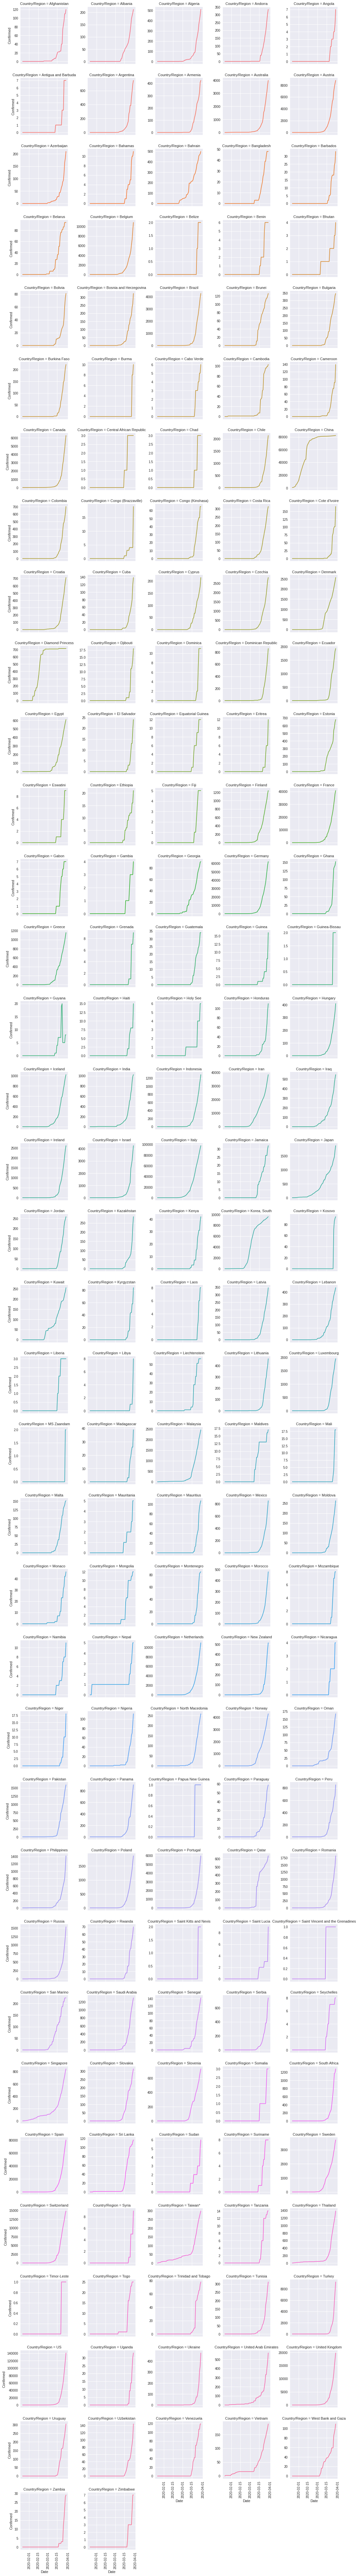

In [37]:
temp = full_table.groupby(['Date', 'Country/Region'])['Confirmed'].sum()
temp = temp.reset_index().sort_values(by=['Date', 'Country/Region'])

plt.style.use('seaborn')
g = sns.FacetGrid(temp, col="Country/Region", hue="Country/Region", 
                  sharey=False, col_wrap=5)
g = g.map(plt.plot, "Date", "Confirmed")
g.set_xticklabels(rotation=90)
plt.show()

### New cases

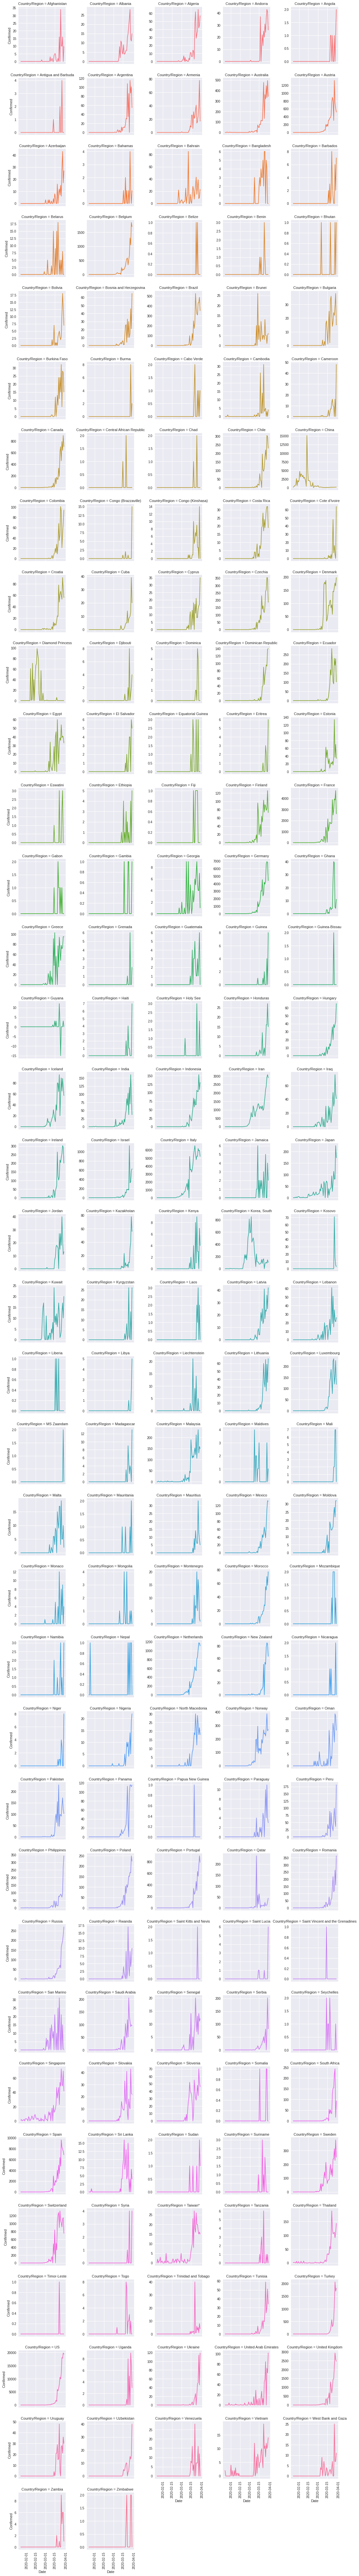

In [38]:
temp = full_table.groupby(['Country/Region', 'Date', ])['Confirmed', 'Deaths', 'Recovered']
temp = temp.sum().diff().reset_index()

mask = temp['Country/Region'] != temp['Country/Region'].shift(1)

temp.loc[mask, 'Confirmed'] = np.nan
temp.loc[mask, 'Deaths'] = np.nan
temp.loc[mask, 'Recovered'] = np.nan

plt.style.use('seaborn')
g = sns.FacetGrid(temp, col="Country/Region", hue="Country/Region", 
                  sharey=False, col_wrap=5)
g = g.map(sns.lineplot, "Date", "Confirmed")
g.set_xticklabels(rotation=90)
plt.show()

# Calander map

### Number of new cases every day

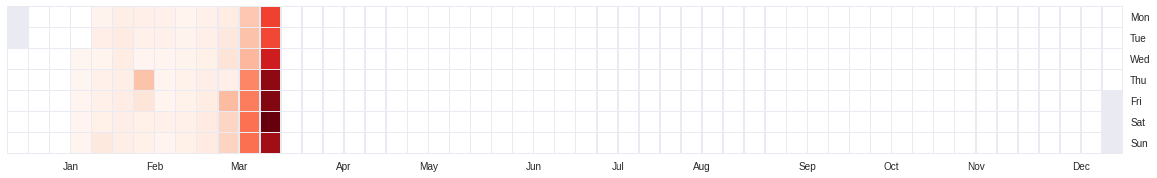

In [39]:
temp = full_table.groupby('Date')['Confirmed'].sum()
temp = temp.diff()

plt.figure(figsize=(20, 5))
ax = calmap.yearplot(temp, fillcolor='white', cmap='Reds', linewidth=0.5)

### Number of new countries every day

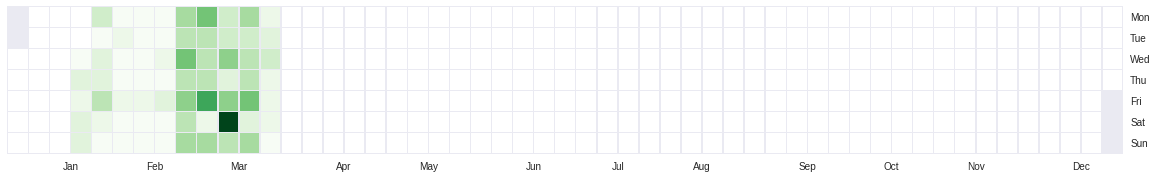

In [40]:
spread = full_table[full_table['Confirmed']!=0].groupby('Date')
spread = spread['Country/Region'].unique().apply(len).diff()

plt.figure(figsize=(20, 5))
ax = calmap.yearplot(spread, fillcolor='white', cmap='Greens', linewidth=0.5)

# Comparison with similar epidemics

https://www.kaggle.com/imdevskp/covid19-vs-sars-vs-mers-vs-ebola-vs-h1n1



In [41]:
epidemics = pd.DataFrame({
    'epidemic' : ['COVID-19', 'SARS', 'EBOLA', 'MERS', 'H1N1'],
    'start_year' : [2019, 2003, 2014, 2012, 2009],
    'end_year' : [2020, 2004, 2016, 2017, 2010],
    'confirmed' : [full_latest['Confirmed'].sum(), 8096, 28646, 2494, 6724149],
    'deaths' : [full_latest['Deaths'].sum(), 774, 11323, 858, 19654]
})

epidemics['mortality'] = round((epidemics['deaths']/epidemics['confirmed'])*100, 2)

epidemics.head()

epidemic  start_year  end_year  confirmed  deaths  mortality
0  COVID-19        2019      2020     720117   33925       4.71
1      SARS        2003      2004       8096     774       9.56
2     EBOLA        2014      2016      28646   11323      39.53
3      MERS        2012      2017       2494     858      34.40
4      H1N1        2009      2010    6724149   19654       0.29

# Analysis on similar epidemics

https://www.kaggle.com/imdevskp/mers-outbreak-analysis  
https://www.kaggle.com/imdevskp/sars-2003-outbreak-analysis  
https://www.kaggle.com/imdevskp/western-africa-ebola-outbreak-analysis
